In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
voice_usage_info = pd.read_csv("data/VOICE_OUTGOING_CALL_USAGE_OFFNET.csv")

voice_usage_info.shape



(33212, 12)

In [3]:
voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),year month,account_num,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,542240120,90feabe2f2846cbf4eb77db650c48a1b,14,1200,201912,0019467547,9c926ad1c6705e1f46462dc5b59d8feb,R-GP,TP-NODE,C300M,870091,1
1,542240244,4c31c59c555ac6f4fdba3cec18674004,186,29616,202001,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
2,542240244,4c31c59c555ac6f4fdba3cec18674004,162,28799,202002,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
3,542240244,4c31c59c555ac6f4fdba3cec18674004,187,34830,202003,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
4,542240244,4c31c59c555ac6f4fdba3cec18674004,116,27311,202005,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33207,552273668,881083811a88758606701519d3f07faa,12,389,202006,0003944938,c78977b555bf659a9586b15dd4f3b608,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33208,552273669,ac8d17782113fb666dc8d8804f46ceaa,8,1560,201908,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33209,552273669,ac8d17782113fb666dc8d8804f46ceaa,8,2100,201909,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33210,552273669,ac8d17782113fb666dc8d8804f46ceaa,15,4020,202001,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1


In [4]:
# ToDo 
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Upload/Downlad/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [5]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source","year month"], keep="last")

voice_usage_info.shape

(33200, 12)

In [6]:
voice_usage_info = voice_usage_info.drop(['event_source.hash','account_num.hash'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','year month':'year-month'}, inplace=True)
voice_usage_info

,event_source,call_count,duration,year-month,account_num,rtom_code,location_code,msan,equp_id,equp_index
0,542240120,14,1200,201912,0019467547,R-GP,TP-NODE,C300M,870091,1
1,542240244,186,29616,202001,0002769147,R-GP,TP-NODE,C300M,870091,1
2,542240244,162,28799,202002,0002769147,R-GP,TP-NODE,C300M,870091,1
3,542240244,187,34830,202003,0002769147,R-GP,TP-NODE,C300M,870091,1
4,542240244,116,27311,202005,0002769147,R-GP,TP-NODE,C300M,870091,1
...,...,...,...,...,...,...,...,...,...,...
33207,552273668,12,389,202006,0003944938,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33208,552273669,8,1560,201908,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33209,552273669,8,2100,201909,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33210,552273669,15,4020,202001,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1


In [7]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0         14
1        186
2        162
3        187
4        116
        ... 
33207     12
33208      8
33209      8
33210     15
33211      4
Name: call_count, Length: 33200, dtype: int64

In [8]:
voice_usage_info.isnull().sum(axis=0)

event_source     0
call_count       0
duration         0
year-month       0
account_num      0
rtom_code        0
location_code    0
msan             0
equp_id          0
equp_index       0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [9]:
voice_usage = voice_usage_info[['event_source','account_num','call_count','duration','year-month']]
voice_usage


,event_source,account_num,call_count,duration,year-month
0,542240120,0019467547,14,1200,201912
1,542240244,0002769147,186,29616,202001
2,542240244,0002769147,162,28799,202002
3,542240244,0002769147,187,34830,202003
4,542240244,0002769147,116,27311,202005
...,...,...,...,...,...
33207,552273668,0003944938,12,389,202006
33208,552273669,000394494X,8,1560,201908
33209,552273669,000394494X,8,2100,201909
33210,552273669,000394494X,15,4020,202001


In [10]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                                                   \
year-month       201908 201909 201910 201911 201912 202001 202002 202003   
event_source                                                               
112053582           164    100    180    147     60     13      0      0   
112053623             6      1      4      4      3      4      3      1   
112053643           263    152    308    171    127    263    213    321   
112054356             4      0      0      0      0      0      0      0   
112055452            25     14     24     16     10     11      7      4   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
912286932            82     58     53     54     65     31     13     24   
912286967            14      0      0      0      0      4     16      3   
912286996             7      5      1      0      5      2      3      0   
912287030            14      0      0      0      0      5      2      0   
912287049             0      3      0      0      1      1      0      1   

                            ... duration                                     \
year-month   202004 202005  ...   201911 201912 202001 202002 202003 202004   
event_source                ...                                               
112053582         0      0  ...    15660   6480   1200      0      0      0   
112053623         4      1  ...      780    480    360    180    120    240   
112053643       376    165  ...    21420  15240  32580  29820  50460  72840   
112054356         0      0  ...        0      0      0      0      0      0   
112055452         7      3  ...     1500    600   1320    420    300    480   
...             ...    ...  ...      ...    ...    ...    ...    ...    ...   
912286932        32      0  ...     3960   5760   2400   2640   2280   3540   
912286967         0     45  ...        0      0    240    960    180      0   
912286996         4      0  ...        0    540    360    360      0    420   
912287030         6     16  ...        0      0    420    120      0    540   
912287049         0      0  ...        0    240     60      0     60      0   

                                          
year-month   202005 202006 202007 202008  
event_source                              
112053582         0      0      0      0  
112053623       120    300    180    180  
112053643     26880  33420  26940  38340  
112054356         0      0    120    180  
112055452       300    540   1980    660  
...             ...    ...    ...    ...  
912286932         0   3000  13740  20820  
912286967      3540   3420   1740    720  
912286996         0    480    660    840  
912287030      3120   2760   3000    720  
912287049         0      0      0    300  

[3191 rows x 26 columns]

In [11]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]

Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [12]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [13]:
pivot_voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

call_count                                                  \
year-month      201908      201909      201910      201911      201912   
count       3191.00000  3191.00000  3191.00000  3191.00000  3191.00000   
mean          52.48229    40.36697    59.98496    47.47916    49.94516   
std          142.66552    98.14961   157.01215   129.72697   127.90444   
min            0.00000     0.00000     0.00000     0.00000     0.00000   
25%            2.00000     1.00000     3.00000     3.00000     3.00000   
50%           19.00000    15.00000    23.00000    19.00000    21.00000   
75%           56.00000    45.00000    63.00000    50.00000    58.00000   
max         3548.00000  2143.00000  3133.00000  3485.00000  3627.00000   

                                                                        ...  \
year-month      202001      202002      202003      202004      202005  ...   
count       3191.00000  3191.00000  3191.00000  3191.00000  3191.00000  ...   
mean          49.62990    43.50204    42.98370    30.19618    24.14510  ...   
std          112.57712    99.30140   103.06990    85.38513    61.83416  ...   
min            0.00000     0.00000     0.00000     0.00000     0.00000  ...   
25%            3.00000     3.00000     2.00000     0.00000     0.00000  ...   
50%           20.00000    17.00000    19.00000    10.00000     9.00000  ...   
75%           56.00000    48.00000    51.00000    33.00000    27.00000  ...   
max         2284.00000  2167.00000  3055.00000  2743.00000  1755.00000  ...   

                duration                                            \
year-month        201911        201912        202001        202002   
count         3191.00000    3191.00000    3191.00000    3191.00000   
mean          5762.86211    6039.69884    6076.35725    5395.17706   
std          16060.00674   15042.11732   13494.65830   12060.80522   
min              0.00000       0.00000       0.00000       0.00000   
25%            195.00000     277.00000     240.00000     237.50000   
50%           1980.00000    2280.00000    2175.00000    1920.00000   
75%           5984.50000    6900.00000    6720.00000    5832.50000   
max         469620.00000  368880.00000  243300.00000  272340.00000   

                                                                    \
year-month        202003        202004        202005        202006   
count         3191.00000    3191.00000    3191.00000    3191.00000   
mean          6033.05327    4976.04513    3621.84394    7206.45628   
std          13220.30466   11621.14108    8382.11791   15558.42581   
min              0.00000       0.00000       0.00000       0.00000   
25%            240.00000       0.00000       0.00000     295.00000   
50%           2400.00000    1353.00000    1066.00000    2860.00000   
75%           6960.00000    5531.00000    4020.00000    8162.00000   
max         340020.00000  301080.00000  205140.00000  385440.00000   

                                        
year-month        202007        202008  
count         3191.00000    3191.00000  
mean          6397.71169    5427.74397  
std          15878.08637   12797.64020  
min              0.00000       0.00000  
25%            204.50000     149.50000  
50%           2160.00000    1860.00000  
75%           6721.50000    5940.00000  
max         432720.00000  259740.00000  

[8 rows x 26 columns]

In [14]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,event_source,call_count,duration,year-month
count,33200.00000,33200.00000,33200.00000,33200.00000
mean,334631525.32509,56.20889,7295.82563,201967.88563
std,206639212.16072,126.97360,15862.24739,46.07265
min,112053582.00000,1.00000,1.00000,201908.00000
25%,112810368.00000,9.00000,1034.75000,201911.00000
50%,332284688.00000,27.00000,3240.00000,202002.00000
75%,512232160.00000,61.00000,7925.25000,202005.00000
max,912287049.00000,3627.00000,469620.00000,202008.00000


In [15]:
# binning call_count
count_bins = [0, 10, 30,60, 100,300,1000,2000,3627]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-15-8ac00b71a459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,5,4,5,5,3,2,0,0,0,0,0,0,0
112053623,1,1,1,1,1,1,1,1,1,1,1,1,1
112053643,5,5,6,5,5,5,5,6,6,5,6,5,5
112054356,1,0,0,0,0,0,0,0,0,0,0,1,1
112055452,2,2,2,2,1,2,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,4,3,3,3,4,3,2,2,3,0,2,4,4
912286967,2,0,0,0,0,1,2,1,0,3,3,2,1
912286996,1,1,1,0,1,1,1,0,1,0,1,1,1


In [16]:
pivot_voice_usage_info['call_count'].describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.00000,3191.000000,3191.00000,3191.000000,3191.000000
mean,2.188969,1.987465,2.319022,2.122219,2.230335,2.205265,2.101849,2.132247,1.69696,1.568160,2.28079,2.152303,2.030711
std,1.699073,1.594809,1.741008,1.632769,1.665029,1.660395,1.598187,1.593501,1.48577,1.361002,1.69495,1.645549,1.580741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.00000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,1.000000,2.00000,2.000000,2.000000
75%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.000000,3.00000,3.000000,3.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,7.000000,8.00000,8.000000,8.000000


In [17]:
# binning duration
duration_bins = [0, 1080, 3300, 8100,16200,32400,64800,240000,469620]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-17-1abd4eb7bf03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,5,5,5,4,3,2,0,0,0,0,0,0,0
112053623,1,1,1,1,1,1,1,1,1,1,1,1,1
112053643,5,5,6,5,4,6,5,6,7,5,6,5,6
112054356,1,0,0,0,0,0,0,0,0,0,0,1,1
112055452,2,2,2,2,1,2,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,4,3,3,3,3,2,2,2,3,0,2,4,5
912286967,1,0,0,0,0,1,1,1,0,3,3,2,1
912286996,1,1,1,0,1,1,1,0,1,0,1,1,1


In [18]:
pivot_voice_usage_info['duration'].describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,2.161078,1.980570,2.280790,2.079599,2.174867,2.179254,2.077092,2.197117,1.892197,1.706362,2.333124,2.179881,2.062990
std,1.667616,1.572769,1.702332,1.586560,1.612687,1.627879,1.562395,1.622821,1.646780,1.461723,1.721056,1.655119,1.577302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000


In [19]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [20]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

### Usage ratings for year-month

In [21]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source,,,,,,,,,,,,,
112053582,25,20,25,20,9,4,0,0,0,0,0,0,0
112053623,1,1,1,1,1,1,1,1,1,1,1,1,1
112053643,25,25,36,25,20,30,25,36,42,25,36,25,30
112054356,1,0,0,0,0,0,0,0,0,0,0,1,1
112055452,4,4,4,4,1,4,1,1,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,16,9,9,9,12,6,4,4,9,0,4,16,20
912286967,2,0,0,0,0,1,2,1,0,9,9,4,1


In [22]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [23]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source,,,,,,,,,,,,,
112053582,0.390625,0.312500,0.390625,0.312500,0.140625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112053623,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.020408,0.015625,0.015625,0.015625
112053643,0.390625,0.390625,0.562500,0.390625,0.312500,0.468750,0.390625,0.562500,0.656250,0.510204,0.562500,0.390625,0.468750
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625
112055452,0.062500,0.062500,0.062500,0.062500,0.015625,0.062500,0.015625,0.015625,0.015625,0.020408,0.015625,0.062500,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.250000,0.140625,0.140625,0.140625,0.187500,0.093750,0.062500,0.062500,0.140625,0.000000,0.062500,0.250000,0.312500
912286967,0.031250,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,0.000000,0.183673,0.140625,0.062500,0.015625
912286996,0.015625,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.015625,0.015625


<AxesSubplot:xlabel='year-month', ylabel='event_source'>

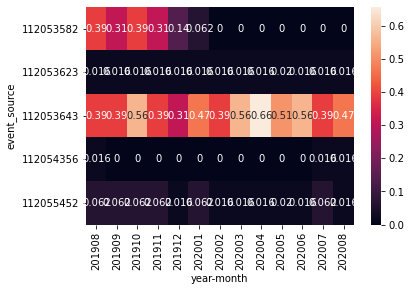

In [24]:
sns.heatmap(pivot_voice_usage_info[year_month_list].head(), annot=True)

In [25]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source,,,,,,,,,,,,,,
112053582,0.390625,0.312500,0.390625,0.312500,0.140625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123798
112053623,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.020408,0.015625,0.015625,0.015625,0.015993
112053643,0.390625,0.390625,0.562500,0.390625,0.312500,0.468750,0.390625,0.562500,0.656250,0.510204,0.562500,0.390625,0.468750,0.465929
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.003606
112055452,0.062500,0.062500,0.062500,0.062500,0.015625,0.062500,0.015625,0.015625,0.015625,0.020408,0.015625,0.062500,0.015625,0.037628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.250000,0.140625,0.140625,0.140625,0.187500,0.093750,0.062500,0.062500,0.140625,0.000000,0.062500,0.250000,0.312500,0.141827
912286967,0.031250,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,0.000000,0.183673,0.140625,0.062500,0.015625,0.038167
912286996,0.015625,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.015625,0.015625,0.012019


### Finding Outliers

array([<AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>,
       <AxesSubplot:xlabel='event_source'>], dtype=object)

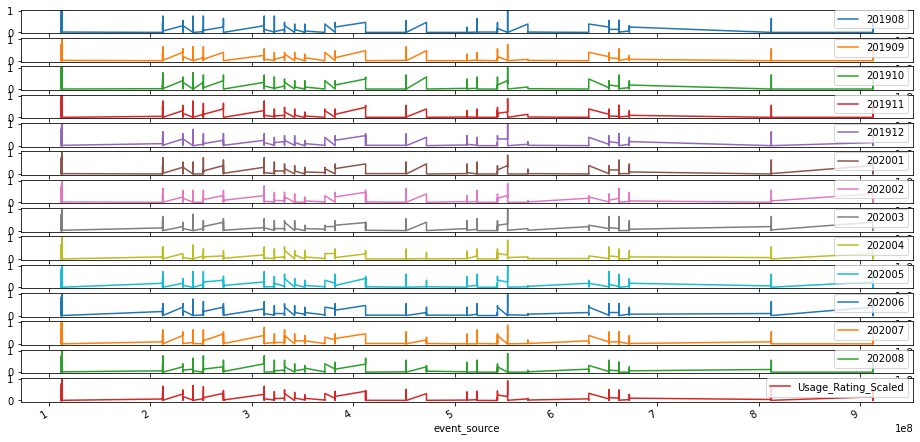

In [26]:
pivot_voice_usage_info.plot.line(subplots=True, figsize=(16,8))

<AxesSubplot:>

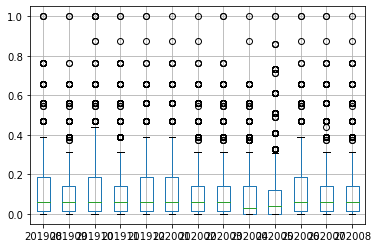

In [27]:
pivot_voice_usage_info.boxplot(column=[201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,])

In [28]:
pivot_voice_usage_info.describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,0.114908,0.097623,0.125436,0.106202,0.114463,0.113948,0.103817,0.110119,0.085392,0.091258,0.125064,0.112548,0.101286,0.107851
std,0.138763,0.122347,0.146255,0.130960,0.132240,0.133495,0.126028,0.127201,0.114835,0.125925,0.141051,0.135715,0.124991,0.114321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001202
25%,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.000000,0.000000,0.015625,0.015625,0.015625,0.024038
50%,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.031250,0.040816,0.062500,0.062500,0.062500,0.073685
75%,0.187500,0.140625,0.187500,0.140625,0.187500,0.187500,0.140625,0.140625,0.140625,0.122449,0.187500,0.140625,0.140625,0.152914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# labling usage bins
bins = [0, 0.08, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.390625,0.312500,0.390625,0.312500,0.140625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123798,MEDIUM
112053623,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.020408,0.015625,0.015625,0.015625,0.015993,LOW
112053643,0.390625,0.390625,0.562500,0.390625,0.312500,0.468750,0.390625,0.562500,0.656250,0.510204,0.562500,0.390625,0.468750,0.465929,HIGH
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.003606,LOW
112055452,0.062500,0.062500,0.062500,0.062500,0.015625,0.062500,0.015625,0.015625,0.015625,0.020408,0.015625,0.062500,0.015625,0.037628,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.250000,0.140625,0.140625,0.140625,0.187500,0.093750,0.062500,0.062500,0.140625,0.000000,0.062500,0.250000,0.312500,0.141827,MEDIUM
912286967,0.031250,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,0.000000,0.183673,0.140625,0.062500,0.015625,0.038167,LOW
912286996,0.015625,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.015625,0.015625,0.012019,LOW


In [30]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [31]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source,,,,,,,,,,,,,,,
112053582,0.390625,0.312500,0.390625,0.312500,0.140625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123798,MEDIUM
112053623,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.020408,0.015625,0.015625,0.015625,0.015993,LOW
112053643,0.390625,0.390625,0.562500,0.390625,0.312500,0.468750,0.390625,0.562500,0.656250,0.510204,0.562500,0.390625,0.468750,0.465929,HIGH
112054356,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.003606,LOW
112055452,0.062500,0.062500,0.062500,0.062500,0.015625,0.062500,0.015625,0.015625,0.015625,0.020408,0.015625,0.062500,0.015625,0.037628,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912286932,0.250000,0.140625,0.140625,0.140625,0.187500,0.093750,0.062500,0.062500,0.140625,0.000000,0.062500,0.250000,0.312500,0.141827,MEDIUM
912286967,0.031250,0.000000,0.000000,0.000000,0.000000,0.015625,0.031250,0.015625,0.000000,0.183673,0.140625,0.062500,0.015625,0.038167,LOW
912286996,0.015625,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.015625,0.015625,0.012019,LOW


In [32]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [38]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source,call_count,duration,year-month,account_num,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,542240120,14,1200,201912,0019467547,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
1,542240244,186,29616,202001,0002769147,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
2,542240244,162,28799,202002,0002769147,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
3,542240244,187,34830,202003,0002769147,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
4,542240244,116,27311,202005,0002769147,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
...,...,...,...,...,...,...,...,...,...,...,...
33207,552273668,12,389,202006,0003944938,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33208,552273669,8,1560,201908,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33209,552273669,8,2100,201909,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33210,552273669,15,4020,202001,000394494X,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881


In [39]:
voice_location_info = voice_location_info.drop_duplicates("event_source", keep="last")
voice_location_info.shape

(3191, 11)

In [40]:
user_location = voice_location_info[['event_source','Location_Identifier']]
user_location

,event_source,Location_Identifier
13,542240244,C300MTP-NODE8700911
26,542240252,C300MTP-NODE8700911
39,542240334,C300MTP-NODE8700911
50,542240352,C300MTP-NODE8700911
60,112199245,MSAG5200-ISLND-PHG-NODE500241
...,...,...
33173,552273650,MSAG5200-ISLBZ-NODE435881
33185,552273662,MSAG5200-ISLBZ-NODE435881
33194,552273664,MSAG5200-ISLBZ-NODE435881
33207,552273668,MSAG5200-ISLBZ-NODE435881


In [41]:
user_location.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")

In [35]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-35-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [36]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,12
1,C300MHT-NE-NODE8152461,17
2,C300MIDH-IDJ-NODE11065541,60
3,C300MKI-NODE10668164,86
4,C300MNW-MEE-NODE18887751,179
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,21
7,C300MVH-NODE9874041,16
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,150


In [37]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Users_by_location.csv")